In [1]:
from OFDM import *
%matplotlib inline

In [2]:
# Create random bit stream, bits are length 10x OFDM symbol length - 0's

ofdm_symbol_size = 1024
cp_length = ofdm_symbol_size // 4
modulation = "QPSK"
pilots_per_block = 64
pilot_value = 3 + 3j

no_bits = 100 * (ofdm_symbol_size // 2 - 1 - pilots_per_block)

bits = np.random.binomial(n=1, p=0.5, size=(no_bits, ))

In [5]:
tx = transmitter(ofdm_symbol_size, cp_length, "QPSK", P=pilots_per_block, pilot_value=pilot_value)

print(len(tx.all_carriers))
print(tx.pilot_carriers)
print(tx.data_carriers)
#signal = tx.transmit(bits)

511
[  1   9  17  25  33  41  49  57  65  73  81  89  97 105 113 121 129 137
 145 153 161 169 177 185 193 201 209 217 225 233 241 249 257 265 273 281
 289 297 305 313 321 329 337 345 353 361 369 377 385 393 401 409 417 425
 433 441 449 457 465 473 481 489 497 505]
[  1   3   4   5   6   7   8   9  11  12  13  14  15  16  17  19  20  21
  22  23  24  25  27  28  29  30  31  32  33  35  36  37  38  39  40  41
  43  44  45  46  47  48  49  51  52  53  54  55  56  57  59  60  61  62
  63  64  65  67  68  69  70  71  72  73  75  76  77  78  79  80  81  83
  84  85  86  87  88  89  91  92  93  94  95  96  97  99 100 101 102 103
 104 105 107 108 109 110 111 112 113 115 116 117 118 119 120 121 123 124
 125 126 127 128 129 131 132 133 134 135 136 137 139 140 141 142 143 144
 145 147 148 149 150 151 152 153 155 156 157 158 159 160 161 163 164 165
 166 167 168 169 171 172 173 174 175 176 177 179 180 181 182 183 184 185
 187 188 189 190 191 192 193 195 196 197 198 199 200 201 203 204 205 206
 207 

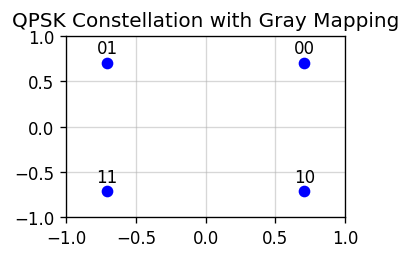

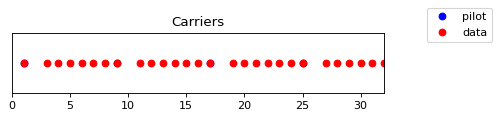

In [4]:
#scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, fsweep)

#signal = play_record(tx, fs=tx.fs, padding_before = 1,padding_after=1)

tx.graphs()

In [5]:
plt.plot(np.arange(len(signal)),signal)

NameError: name 'signal' is not defined

In [6]:
rx = receiver(ofdm_symbol_size, cp_length, "QPSK")

rx_bits = rx.receive(signal)


------------------------------------------
 Receive 
------------------------------------------



In [9]:
errs = np.sum(abs(bits-rx_bits))
errs

0

(100, 1024)
511


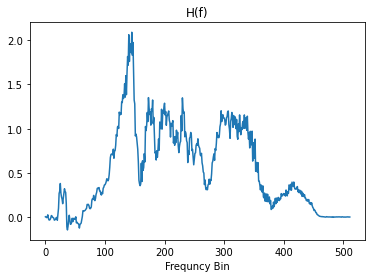

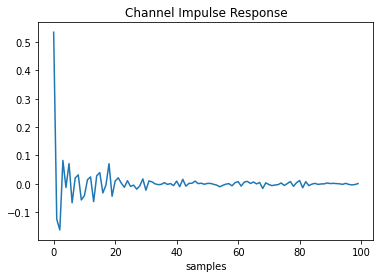

In [264]:


rx_p = rx.reshape(-1,prefix_length+ofdm_symbol_size)

rx_p_nocp = rx_p[:,prefix_length:]

print(rx_p_nocp.shape)
rx_symbols = FFT(rx_p_nocp)
rx_symbols = rx_symbols[:,1:no_data_carriers+1]

H = rx_symbols / QPSK


print(H.shape[1])

for i in range(0,H.shape[1]):
    avg.real[i] = np.mean(H[:,i].real)
    avg.imag[i] = np.mean(H[:,i].imag)

plt.plot(np.arange(0,len(avg)), avg.real)
plt.title("H(f)")
plt.xlabel("Frequncy Bin")
plt.savefig("plots/channe_freq_response.jpg")
plt.show()
plt.plot(np.arange(0,100),np.fft.ifft(avg).real[:100])
plt.title("Channel Impulse Response")
plt.xlabel("samples")
plt.savefig("plots/channel_impulse_response.jpg")
plt.show()


In [49]:
x = np.arange(1,512)
n = 8
K = 512
y = x[::n]
if((K-1)%n > 1):
    y = np.append(y,x[-1])
print(len(y))

65
